In [1]:
import pandas as pd
import numpy as np

In [2]:
import yfinance as yf

In [3]:
ticker = "AAPL"  # Apple

In [4]:
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

C:\Users\jasje\AppData\Local\Temp\ipykernel_58344\3035735566.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [5]:
print(data.head())

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.211205  128.954553  122.324579  128.343772  112117500
2023-01-04  124.482040  126.747861  123.221065  125.004162   89113600
2023-01-05  123.161942  125.871071  122.905811  125.240583   80962700
2023-01-06  127.693588  128.353629  123.033890  124.137247   87754700
2023-01-09  128.215683  131.427242  127.959553  128.530934   70790800


| Column                | Meaning                                     |
| --------------------- | ------------------------------------------- |
| **Open**              | Price at the start of the trading day       |
| **High**              | Highest price during the day                |
| **Low**               | Lowest price during the day                 |
| **Close**             | Price at the end of the trading day         |
| **Volume**            | Number of shares traded that day            |
| **Price / Adj Close** | Closing price adjusted for splits/dividends |


In [6]:
filename = f"{ticker}_stock_data.csv"

In [7]:
data.to_csv(filename)

In [8]:
ticker = input("Enter stock ticker (example: AAPL, TSLA, MSFT): ")
start = input("Enter start date (YYYY-MM-DD): ")
end = input("Enter end date (YYYY-MM-DD): ")

print("Fetching stock data...")

data = yf.download(ticker, start=start, end=end)

filename = f"{ticker}_data.csv"
data.to_csv(filename)

print(f"Stock data saved to {filename}")

Fetching stock data...


C:\Users\jasje\AppData\Local\Temp\ipykernel_58344\2199283524.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Stock data saved to TSLA_data.csv


In [9]:
df = pd.read_csv("TSLA_data.csv")

In [10]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2022-01-03,399.9266662597656,400.3566589355469,378.67999267578125,382.5833435058594,103931400
3,2022-01-04,383.1966552734375,402.6666564941406,374.3500061035156,396.51666259765625,100248300
4,2022-01-05,362.7066650390625,390.11334228515625,360.336669921875,382.2166748046875,80119800


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   794 non-null    object
 1   Close   793 non-null    object
 2   High    793 non-null    object
 3   Low     793 non-null    object
 4   Open    793 non-null    object
 5   Volume  793 non-null    object
dtypes: object(6)
memory usage: 37.3+ KB


In [13]:
import matplotlib.pyplot as plt

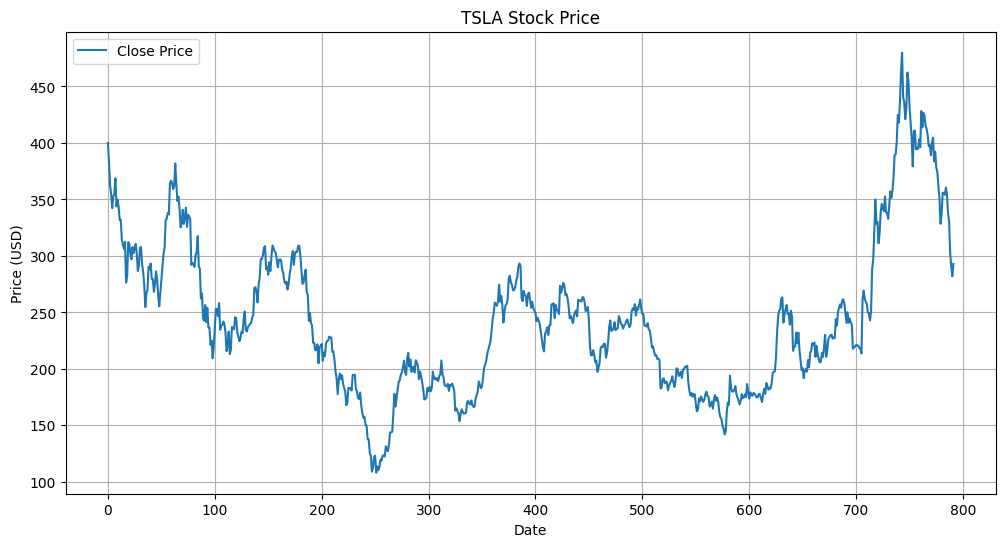

In [37]:

plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="Close Price")

plt.title(f"{ticker} Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)

plt.show()

This graph shows:
✅ Trend direction
✅ Long-term movement
✅ Support/resistance visually

### Moving Averages (Trend Detection)

A Moving Average (MA) is:

The average price of a stock over the last N days, recalculated every day as new data comes in.

Example:
If you use a 5-day moving average, then:

Day 6 MA = average of prices from Day 2 to Day 6
Day 7 MA = average of prices from Day 3 to Day 7
…and so on.

That’s why it’s called “moving” — the window keeps sliding forward.

Moving Averages:
✅ Smooth out this noise
✅ Remove short-term fluctuations
✅ Show the underlying direction

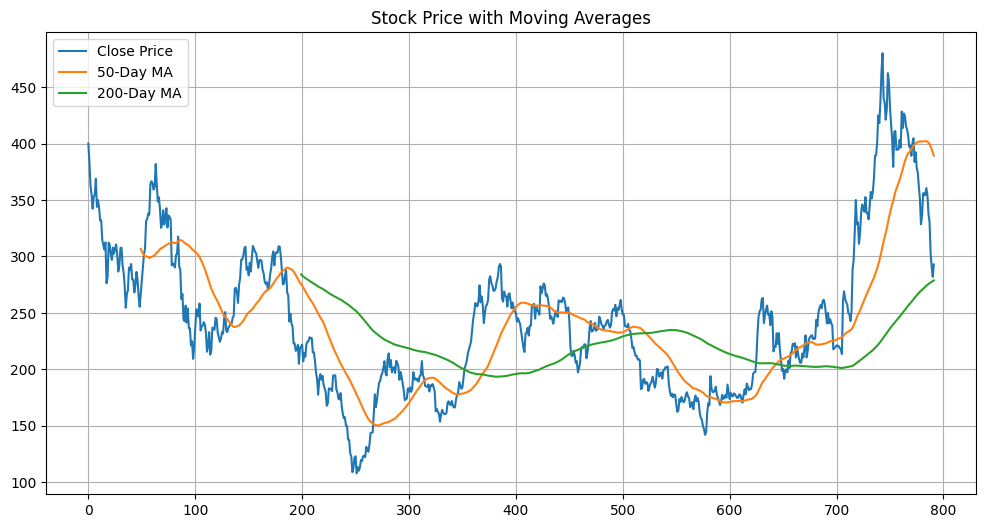

In [36]:
data["MA50"] = data[('Close', 'TSLA')].rolling(window=50).mean()
data["MA200"] = data[('Close', 'TSLA')].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
    
plt.plot(data.index, data[('Close', 'TSLA')], label="Close Price")
plt.plot(data.index, data["MA50"], label="50-Day MA")
plt.plot(data.index, data["MA200"], label="200-Day MA")

plt.title("Stock Price with Moving Averages")
plt.legend()
plt.grid(True)
plt.show()


| Indicator    | Meaning                        |
| ------------ | ------------------------------ |
| MA50         | Short-term trend (fast moving) |
| MA200        | Long-term trend (slow moving)  |
| MA50 > MA200 | Usually bullish (Golden Cross)               |
| MA50 < MA200 | Usually bearish                |


Bullish = "Prices will rise."

Bearish = "Prices will fall."

### Volume Graph

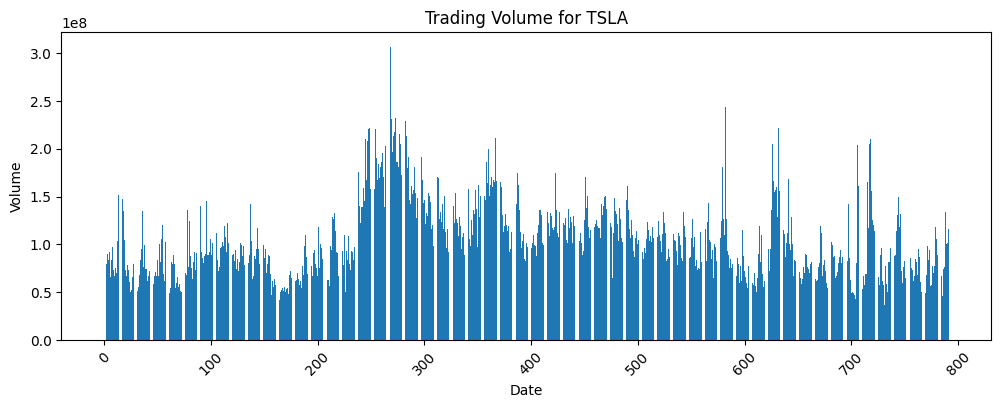

In [29]:
plt.figure(figsize=(12, 4))

# Using multi-level column indexing to access 'Volume' for 'TSLA'
plt.bar(data.index, data[('Volume', 'TSLA')])

# Plot details
plt.title("Trading Volume for TSLA")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()

Volume spikes often show:
- Big investor action
- News events
- Breakouts

## RSI
The Relative Strength Index (RSI) is a tool used in trading to measure how overbought or oversold a stock or asset is. It ranges from 0 to 100

Overbought → above 70
Oversold → below 30

C:\Users\jasje\AppData\Local\Temp\ipykernel_58344\555143023.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price            Close        RSI
Ticker            AAPL           
Date                             
2023-12-22  191.788757  59.246140
2023-12-26  191.243881  49.031859
2023-12-27  191.342972  52.291502
2023-12-28  191.768951  47.920433
2023-12-29  190.728775  40.185271


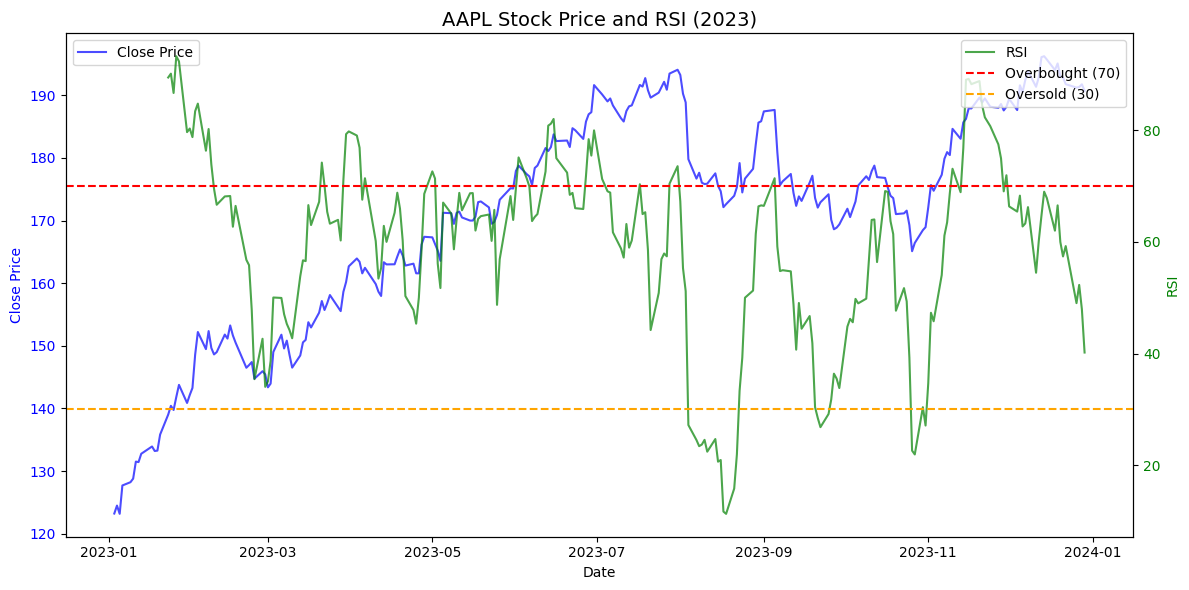

In [40]:
data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")

# Calculate RSI
delta = data["Close"].diff() # diff() calculates the daily difference in the Close price (today's close - yesterday's close)

#Gain: A series where we only keep positive changes (and 0 where price went down).
#Loss: A series where we only keep the negative changes as positive values (and 0 where the price went up).

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss
data["RSI"] = 100 - (100 / (1 + rs))

print(data[["Close", "RSI"]].tail())

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Close price
ax1.plot(data.index, data["Close"], label="Close Price", color="blue", alpha=0.7)
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a second y-axis for the RSI
ax2 = ax1.twinx()
ax2.plot(data.index, data["RSI"], label="RSI", color="green", alpha=0.7)
ax2.axhline(y=70, color='red', linestyle='--', label="Overbought (70)")
ax2.axhline(y=30, color='orange', linestyle='--', label="Oversold (30)")
ax2.set_ylabel("RSI", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Adding title and legend
plt.title("AAPL Stock Price and RSI (2023)", fontsize=14)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\jasje\AppData\Local\Temp\ipykernel_58344\217835351.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2023-01-01", end="2023-06-01")
[*********************100%***********************]  1 of 1 completed


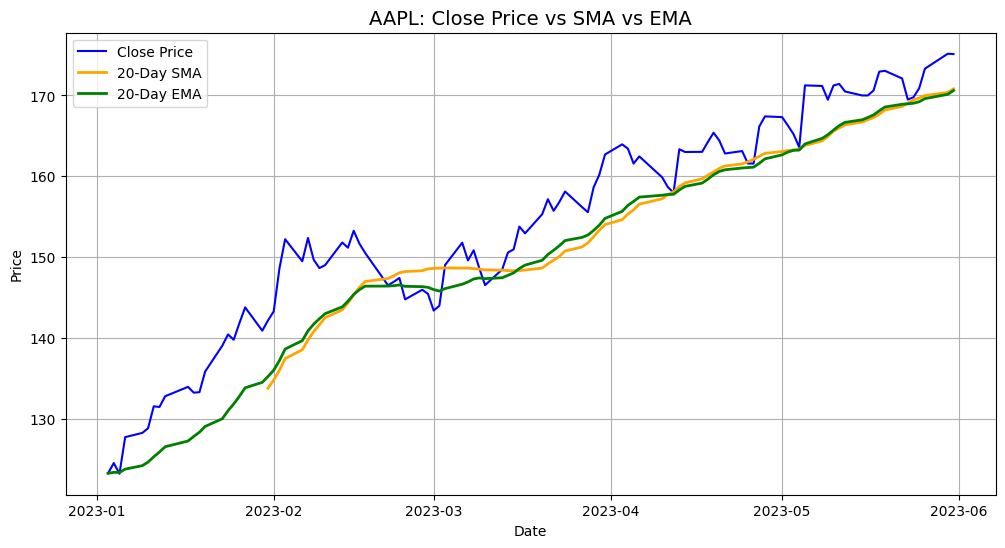

Price            Close      SMA_20      EMA_20
Ticker            AAPL                        
Date                                          
2023-05-24  169.779083  169.454488  169.046319
2023-05-25  170.915298  169.692233  169.224317
2023-05-26  173.326035  169.987864  169.614957
2023-05-30  175.173615  170.380313  170.144353
2023-05-31  175.124191  170.822091  170.618623


In [41]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download AAPL data
data = yf.download("AAPL", start="2023-01-01", end="2023-06-01")

# Calculate 20-day SMA and EMA
data["SMA_20"] = data["Close"].rolling(window=20).mean()
data["EMA_20"] = data["Close"].ewm(span=20, adjust=False).mean()

# Plotting
plt.figure(figsize=(12,6))

plt.plot(data["Close"], label="Close Price", color="blue")
plt.plot(data["SMA_20"], label="20-Day SMA", color="orange", linewidth=2)
plt.plot(data["EMA_20"], label="20-Day EMA", color="green", linewidth=2)

plt.title("AAPL: Close Price vs SMA vs EMA", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Show last few values
print(data[["Close", "SMA_20", "EMA_20"]].tail())


MACD (Moving Average Convergence Divergence) is a trading indicator that shows the momentum and trend direction of a stock.

It compares two moving averages (usually 12-day and 26-day) to see if the price trend is strengthening or weakening.

When the MACD line crosses above the signal line → bullish momentum.

When it crosses below → bearish momentum.

Price           MACD    Signal
Ticker                        
Date                          
2023-05-24  2.328388  2.720825
2023-05-25  2.205405  2.617741
2023-05-26  2.276227  2.549438
2023-05-30  2.453159  2.530182
2023-05-31  2.559883  2.536122


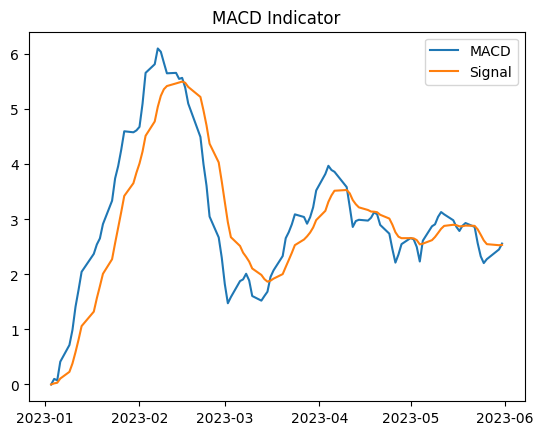

In [42]:
short_ema = data["Close"].ewm(span=12, adjust=False).mean()
long_ema = data["Close"].ewm(span=26, adjust=False).mean()

data["MACD"] = short_ema - long_ema
data["Signal"] = data["MACD"].ewm(span=9, adjust=False).mean()

print(data[["MACD", "Signal"]].tail())

plt.plot(data["MACD"], label="MACD")
plt.plot(data["Signal"], label="Signal")
plt.legend()
plt.title("MACD Indicator")
plt.show()


## Bolinger Bands

In [45]:
data["Middle"] = data[('Close', 'AAPL')].rolling(20).mean()
data["Upper"] = data["Middle"] + (2 * data[('Close', 'AAPL')].rolling(20).std())
data["Lower"] = data["Middle"] - (2 * data[('Close', 'AAPL')].rolling(20).std())

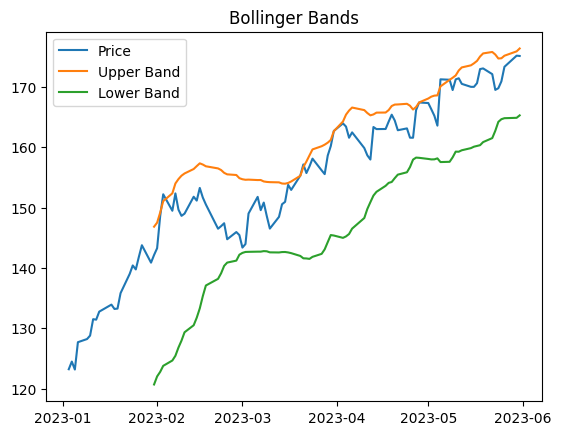

In [46]:
plt.plot(data["Close"], label="Price")
plt.plot(data["Upper"], label="Upper Band")
plt.plot(data["Lower"], label="Lower Band")

plt.legend()
plt.title("Bollinger Bands")
plt.show()


Bollinger Bands help traders see:
 - Volatility (how much the price is moving)
 - Breakouts (when price may start a big move up or down)

They consist of three lines around the price.

C:\Users\jasje\AppData\Local\Temp\ipykernel_58344\2692158960.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
C:\Users\jasje\AppData\Local\Temp\ipykernel_58344\2692158960.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
C:\Users\jasje\AppData\Local\Temp\ipykernel_58344\2692158960.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda = yf.download("NVDA", start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


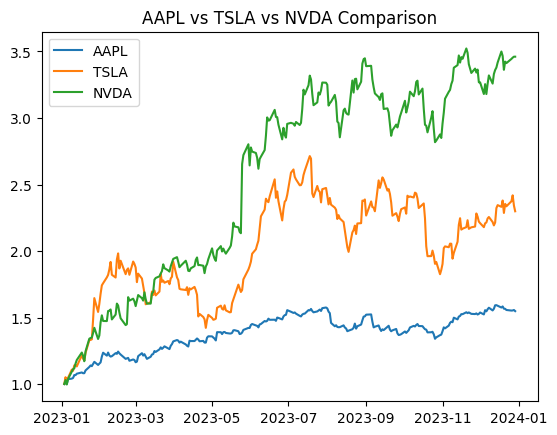

In [48]:
import yfinance as yf
import matplotlib.pyplot as plt

aapl = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
tsla = yf.download("TSLA", start="2023-01-01", end="2024-01-01")
nvda = yf.download("NVDA", start="2023-01-01", end="2024-01-01")

# Normalize so both start at same point
aapl_norm = aapl["Close"] / aapl["Close"].iloc[0]
tsla_norm = tsla["Close"] / tsla["Close"].iloc[0]
nvda_norm = nvda["Close"] / nvda["Close"].iloc[0]   

plt.plot(aapl_norm, label="AAPL")
plt.plot(tsla_norm, label="TSLA")
plt.plot(nvda_norm, label="NVDA")

plt.legend()
plt.title("AAPL vs TSLA vs NVDA Comparison")
plt.show()
